In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

# Fetching Dataset

In [2]:
df = pd.read_csv('dataset/loan.csv', low_memory=False)

# Gathering information about the dataset

In [3]:
orig_rows, orig_cols = df.shape
print(f'original rows = {orig_rows}, cols = {orig_cols}')

original rows = 39717, cols = 111


#### this is how many rows pandas will show by default with methods like pd.dataframe.head()

In [4]:
pd.options.display.max_rows

60

#### we want to increase it, because in this case there are a lot of column names

In [5]:
pd.options.display.max_rows = 200

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.00,516221.00,665665.000000,8.377550e+05,1.077501e+06
member_id,39717.0,850463.559408,265678.307421,70699.00,666780.00,850812.000000,1.047339e+06,1.314167e+06
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.000000,1.500000e+04,3.500000e+04
funded_amnt,39717.0,10947.713196,7187.238670,500.00,5400.00,9600.000000,1.500000e+04,3.500000e+04
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.00,5000.00,8975.000000,1.440000e+04,3.500000e+04
installment,39717.0,324.561922,208.874874,15.69,167.02,280.220000,4.307800e+02,1.305190e+03
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.000000,8.230000e+04,6.000000e+06
dti,39717.0,13.315130,6.678594,0.00,8.17,13.400000,1.860000e+01,2.999000e+01
delinq_2yrs,39717.0,0.146512,0.491812,0.00,0.00,0.000000,0.000000e+00,1.100000e+01
inq_last_6mths,39717.0,0.869200,1.070219,0.00,0.00,1.000000,1.000000e+00,8.000000e+00


> by looking at the description about, it is clear that a lot of columns are fully `NaN` or Missing. these columns are of no use to us, so we are better off without them.

# Data Cleaning

### there are a lot of columns with null value, let's drop them

In [7]:
# dropping all columns that have all values as NaN, removing fully missing data
df = df.dropna(axis=1, how='all')

### considering any row that has more than 5 column values missing is not a good representative of the dataset, let's remove them as well

In [8]:
# retaining the rows having <= 5 NaNs
df = df[df.isnull().sum(axis=1) <= 5]

### dropping any column that only has 1 value, as it can't be used by us to identify anything about the dataset

In [9]:
tmp_df = df.nunique()==1
df = df.drop(list(tmp_df[tmp_df==True].index), axis=1)

### dropping any column that has more than 90% missing values

In [10]:
df = df.dropna(axis=1, thresh=df.shape[0]*0.1)

In [11]:
# droping desc column as it has missing values but is not required for our analysis
df = df.drop(['desc'], axis=1)

In [12]:
df.shape

(39454, 45)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39454 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39454 non-null  int64  
 1   member_id                39454 non-null  int64  
 2   loan_amnt                39454 non-null  int64  
 3   funded_amnt              39454 non-null  int64  
 4   funded_amnt_inv          39454 non-null  float64
 5   term                     39454 non-null  object 
 6   int_rate                 39454 non-null  object 
 7   installment              39454 non-null  float64
 8   grade                    39454 non-null  object 
 9   sub_grade                39454 non-null  object 
 10  emp_title                37249 non-null  object 
 11  emp_length               38624 non-null  object 
 12  home_ownership           39454 non-null  object 
 13  annual_inc               39454 non-null  float64
 14  verification_status   

> we have 45 columns left, some of which might not be of any use to us. so let's understand them and remove any unwanted columns

Below are a few columns that i consider not required for this case study. as the goal of this case study is to `find potential defaulters`, few columns can't contribute to that observation according to me. mentioned down the columns and reason as well.

1. some ***applicant identification columns***, as these columns play no role on determining in the applicant will default
    1. _id_
    1. _member_id_
    1. _emp_title_
    1. _zip_code_
1. some ***record identification columns***, similar to user identification columns, these have no impact on defaulting a loan.
    1. _title_
    1. _url_
1. some ***inverstor specific columns***, some columns are for investors, so we can remove them as well
    1. _out_prncp_inv_
    1. _total_pymnt_inv_
    1. _funded_amnt_inv_
1. some ***post loan approval metrics***, as we are trying to identify loan defaulters, any post loan approval column should have no impact as it is now outside the scope of a approval criterias
    1. _delinq_2yrs_
    1. _revol_bal_
    1. _out_prncp_
    1. _total_pymnt_
    1. _total_rec_prncp_
    1. _total_rec_int_
    1. _total_rec_late_fee_
    1. _recoveries_
    1. _collection_recovery_fee_
    1. _last_pymnt_d_
    1. _last_pymnt_amnt_
    1. _next_pymnt_d_
    1. _chargeoff_within_12_mths_
    1. _mths_since_last_delinq_
    1. _mths_since_last_record_
    1. _pub_rec_bankruptcies_
    1. _last_credit_pull_d_


#### now let's drop all the above mentioned columns

In [14]:
df = df.drop(
    ['id', 'member_id', 'emp_title', 'zip_code', 'title', 'url', 'delinq_2yrs', 'revol_bal', 'out_prncp', 'total_pymnt', 
        'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 
        'last_pymnt_amnt', 'mths_since_last_delinq', 'out_prncp_inv', 'total_pymnt_inv', 'funded_amnt_inv',
        'pub_rec_bankruptcies', 'last_credit_pull_d']
    , axis=1)

In [15]:
df.loan_status.value_counts()

Fully Paid     32738
Charged Off     5576
Current         1140
Name: loan_status, dtype: int64

#### there are 3 types of loan_status in this dataset, `Fully Paid`, `Charged Off` and `Current`. we can use the first to for our observations, but `Current` is an active loan record which will not give us a clean picture of the defaulter determining analysis. let's remove records with loan_status as `Current`

In [16]:
df = df[df.loan_status!='Current']
df.loan_status.value_counts()

Fully Paid     32738
Charged Off     5576
Name: loan_status, dtype: int64

### checking for any remaining missing values

In [17]:
(df.isna().sum()/len(df.index))*100

loan_amnt              0.000000
funded_amnt            0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.056689
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.117451
total_acc              0.000000
dtype: float64

#### emp_length

In [18]:
df.emp_length.value_counts()

10+ years    8486
< 1 year     4499
2 years      4291
3 years      4012
4 years      3341
5 years      3193
1 year       3165
6 years      2167
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [19]:
df.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

as there is very little amount of missing values now in emp_length column and the mode value has high frequency w.r.t. the next most often value, let's fill na records with mode value

In [20]:
df.emp_length.fillna(df.emp_length.mode()[0], inplace=True)

#### revol_util

In [21]:
df.revol_util.value_counts()

0%        944
63%        62
0.20%      61
40.70%     56
31.20%     56
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

In [22]:
df.revol_util.mode()

0    0%
Name: revol_util, dtype: object

here also the mode value is much more frequent from the next most frequent value. let's fill na with mode value here as well

In [23]:
df.revol_util.fillna(df.revol_util.mode()[0], inplace=True)

> now let's look at the datatypes of all the remaining columns and `Convert incorrect data types`

## Convert incorrect data types

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38314 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38314 non-null  int64  
 1   funded_amnt          38314 non-null  int64  
 2   term                 38314 non-null  object 
 3   int_rate             38314 non-null  object 
 4   installment          38314 non-null  float64
 5   grade                38314 non-null  object 
 6   sub_grade            38314 non-null  object 
 7   emp_length           38314 non-null  object 
 8   home_ownership       38314 non-null  object 
 9   annual_inc           38314 non-null  float64
 10  verification_status  38314 non-null  object 
 11  issue_d              38314 non-null  object 
 12  loan_status          38314 non-null  object 
 13  purpose              38314 non-null  object 
 14  addr_state           38314 non-null  object 
 15  dti                  38314 non-null 

#### sub_grade

In [25]:
df['sub_grade'] = df.sub_grade.apply(lambda x: int(x[-1]))

#### int_rate

In [26]:
df.int_rate.value_counts()

10.99%    907
11.49%    788
7.51%     777
13.49%    744
7.88%     721
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

we can see here that the `int_rate` is provided as a `string representation of percentage` value. let's fix that

In [27]:
df['int_rate'] = df.int_rate.apply(lambda x: float(x.rstrip('%')))

#### revol_util

In [28]:
df.revol_util.value_counts()

0%        989
63%        62
0.20%      61
40.70%     56
31.20%     56
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

we can see here that the `revol_util` is provided as a `string representation of percentage` value. let's fix that

In [29]:
df['revol_util'] = df.revol_util.apply(lambda x: float(str(x).rstrip('%')))

#### emp_length

In [30]:
df.emp_length.value_counts()

10+ years    9274
< 1 year     4499
2 years      4291
3 years      4012
4 years      3341
5 years      3193
1 year       3165
6 years      2167
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

we see here that _emp_length_ is has years of employement in `n years` format, but with min and max values being range (_10+ years_ & _< 1 years_). to make it more consistent we can assume that:

1. < 1 years = 0 years
1. +10 years = 10 years

and then change this value to just number of years. let's do that now

In [31]:
df['emp_length'] = df.emp_length.apply(lambda x: 0 if '<' in x else (10 if '+' in x else int(x.split(' ')[0])))

## Handling Outliers in dataset

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,38314.0,11069.500705,7348.611859,500.00,5400.00,9800.00,15000.00,35000.00
funded_amnt,38314.0,10806.112648,7091.552359,500.00,5200.00,9600.00,15000.00,35000.00
int_rate,38314.0,11.946878,3.687884,5.42,8.94,11.78,14.42,24.40
installment,38314.0,323.137910,208.687311,15.69,166.19,278.54,426.14,1305.19
sub_grade,38314.0,3.054680,1.395677,1.00,2.00,3.00,4.00,5.00
emp_length,38314.0,5.046328,3.592366,0.00,2.00,4.00,9.00,10.00
annual_inc,38314.0,68911.521718,64329.443471,4000.00,40101.00,59000.00,82000.00,6000000.00
dti,38314.0,13.275065,6.667179,0.00,8.14,13.37,18.55,29.99
inq_last_6mths,38314.0,0.872109,1.071399,0.00,0.00,1.00,1.00,8.00
open_acc,38314.0,9.282534,4.400536,2.00,6.00,9.00,12.00,44.00


> by the looks of it, `annual_inc` column should have some outliers as the max value is very large w.r.t. the mean and even 75% qauntile

#### annual_inc

<Axes: >

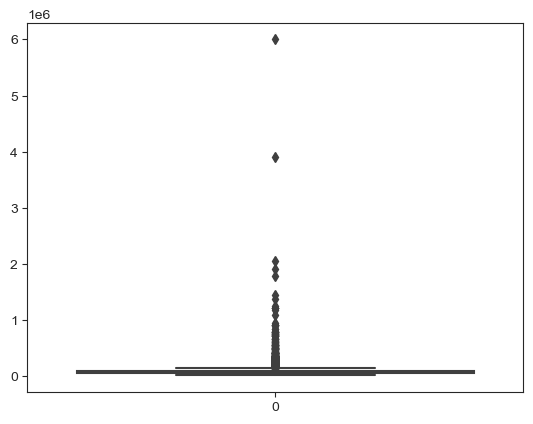

In [33]:
sns.boxplot(df.annual_inc)

In [34]:
df.annual_inc.quantile([x/100 for x in range(0, 101, 5)])

0.00       4000.00
0.05      24000.00
0.10      30000.00
0.15      34000.00
0.20      37440.00
0.25      40101.00
0.30      45000.00
0.35      48000.00
0.40      50209.60
0.45      54996.00
0.50      59000.00
0.55      61999.15
0.60      65499.80
0.65      70800.00
0.70      75000.00
0.75      82000.00
0.80      90000.00
0.85     100000.00
0.90     115500.00
0.95     140004.00
1.00    6000000.00
Name: annual_inc, dtype: float64

#### here we can see that the general distribution of annual_inc is continuous, except after 95<sup>th</sup> percentile. let's remove all the records beyond 95<sup>th</sup> percentile.

In [35]:
df = df[df.annual_inc <= df.annual_inc.quantile(0.95)]

<Axes: >

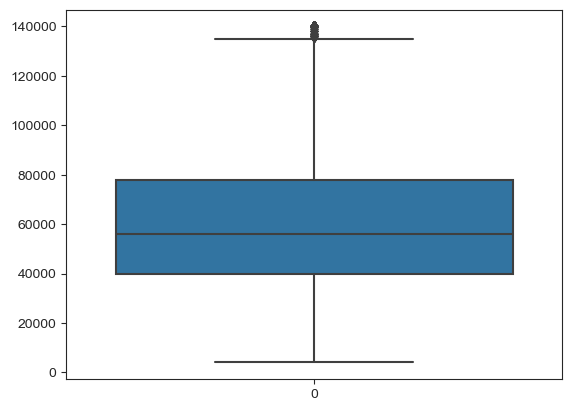

In [36]:
sns.boxplot(df.annual_inc)

> boxplot graph looks much better now after dealing with the outliers

## Final Observations about dataset after cleaning is done

In [37]:
df.shape

(36400, 22)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36400 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            36400 non-null  int64  
 1   funded_amnt          36400 non-null  int64  
 2   term                 36400 non-null  object 
 3   int_rate             36400 non-null  float64
 4   installment          36400 non-null  float64
 5   grade                36400 non-null  object 
 6   sub_grade            36400 non-null  int64  
 7   emp_length           36400 non-null  int64  
 8   home_ownership       36400 non-null  object 
 9   annual_inc           36400 non-null  float64
 10  verification_status  36400 non-null  object 
 11  issue_d              36400 non-null  object 
 12  loan_status          36400 non-null  object 
 13  purpose              36400 non-null  object 
 14  addr_state           36400 non-null  object 
 15  dti                  36400 non-null 

In [39]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,Fully Paid,wedding,AZ,11.20,Nov-04,3,9,0,28.3,12


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,36400.0,10703.099588,7047.663426,500.00,5000.000,9250.00,15000.00,35000.00
funded_amnt,36400.0,10456.733516,6801.171677,500.00,5000.000,9000.00,14400.00,35000.00
int_rate,36400.0,11.902450,3.663634,5.42,8.940,11.71,14.35,24.40
installment,36400.0,312.521256,199.262440,15.69,163.655,271.44,409.35,1305.19
sub_grade,36400.0,3.053709,1.395873,1.00,2.000,3.00,4.00,5.00
emp_length,36400.0,5.010604,3.584585,0.00,2.000,4.00,9.00,10.00
annual_inc,36400.0,60977.249239,27736.708886,4000.00,40000.000,56000.00,78000.00,140004.00
dti,36400.0,13.448802,6.655833,0.00,8.360,13.58,18.71,29.99
inq_last_6mths,36400.0,0.864258,1.063886,0.00,0.000,1.00,1.00,8.00
open_acc,36400.0,9.174121,4.352255,2.00,6.000,8.00,12.00,44.00


In [41]:
(1 - (df.shape[0]/orig_rows)) * 100

8.351587481431121

 > we have lost `8.35%` of records after data cleaning stage

In [42]:
orig_cols - df.shape[1]

89

> we have lost `89` columns after data cleaning stage

# Data Analysis

now that we have our dataset ready for determining loan defaulter tendencies. let's work on performing all kinds of analysis we learned in `Exploratory Data Analysis`. we will be comparing __loan_status__ to all other columns in multiple ways to find statictical evidence of relation between the columns and loan_status. Let's do that now.

1. **Univariate Analysis**
1. **Derived Variables Analysis**
1. **Segmented Univariate Analysis**
1. **Bivariate Analysis**

## Univariate Analysis

<Axes: xlabel='loan_status', ylabel='count'>

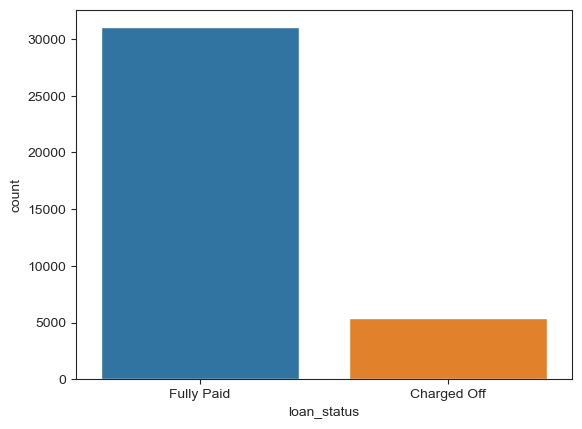

In [43]:
sns.countplot(x='loan_status', data = df)

> as we are intrested in _Charged Off_ more that Fully Paid. let's analyze counts of some columns when we just look at Charged Off dataset. 

### grade

<Axes: xlabel='grade', ylabel='count'>

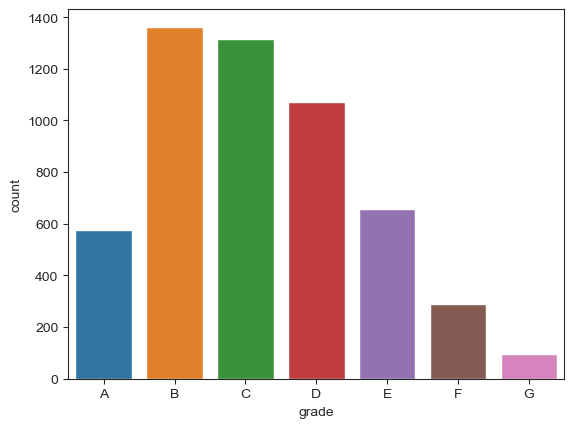

In [44]:
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], data = df[df.loan_status == 'Charged Off'])

let's see if we find anything intresting if we add _sub_grade_ as will in the plot

<Axes: xlabel='grade', ylabel='count'>

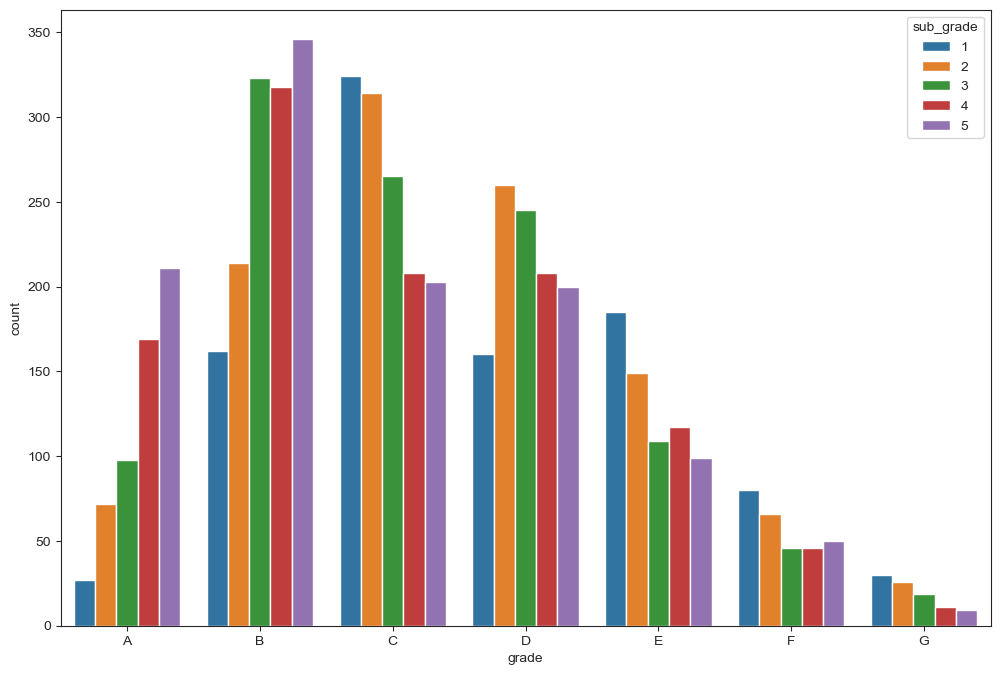

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue = 'sub_grade', data = df[df.loan_status == 'Charged Off'], ax=ax)

### emp_length

<Axes: xlabel='emp_length', ylabel='count'>

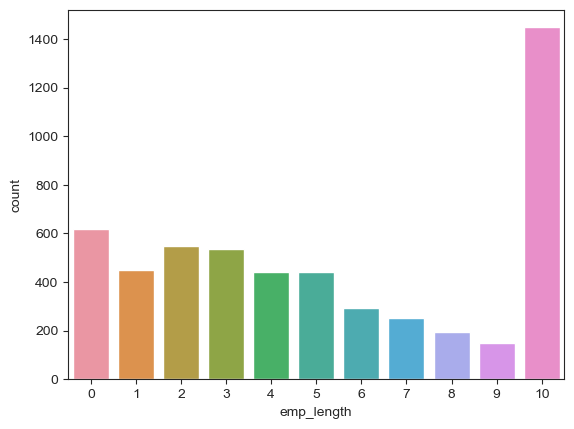

In [46]:
sns.countplot(x = 'emp_length', data = df[df.loan_status == 'Charged Off'])

### home_ownership

<Axes: xlabel='home_ownership', ylabel='count'>

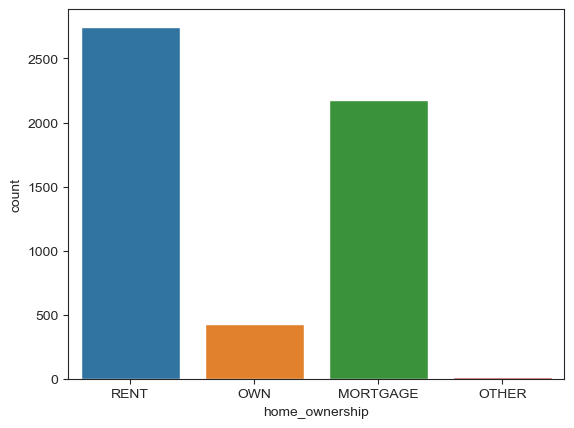

In [47]:
#replacing 'NONE' with 'OTHERS'
df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
sns.countplot(x = 'home_ownership', data = df[df.loan_status == 'Charged Off'])

### term

<Axes: xlabel='term', ylabel='count'>

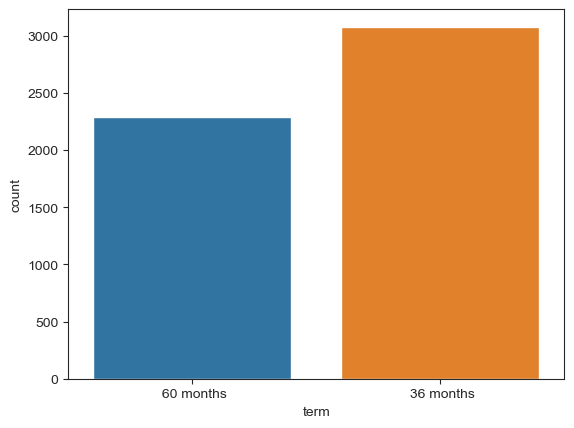

In [48]:
sns.countplot(x = 'term', data = df[df.loan_status == 'Charged Off'])


### pub_rec

<Axes: xlabel='pub_rec', ylabel='count'>

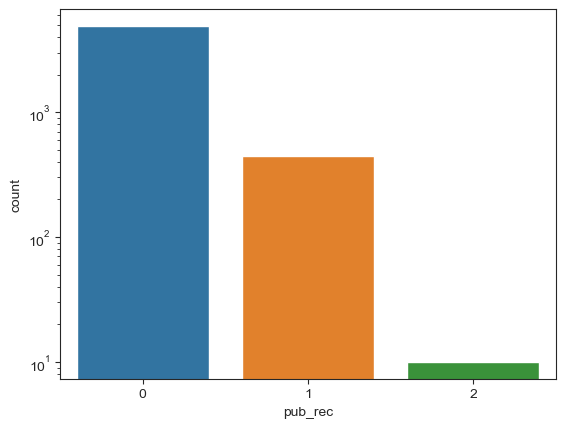

In [79]:
fig, ax = plt.subplots()
ax.set_yscale('log')
sns.countplot(x = 'pub_rec', data = df[df.loan_status == 'Charged Off'])

### open_acc

<Axes: xlabel='open_acc', ylabel='count'>

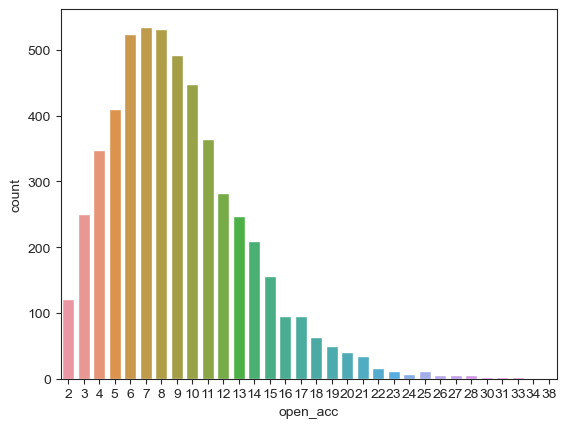

In [103]:
sns.countplot(x = 'open_acc', data = df[df.loan_status == 'Charged Off'])

### inq_last_6mths

<Axes: xlabel='inq_last_6mths', ylabel='count'>

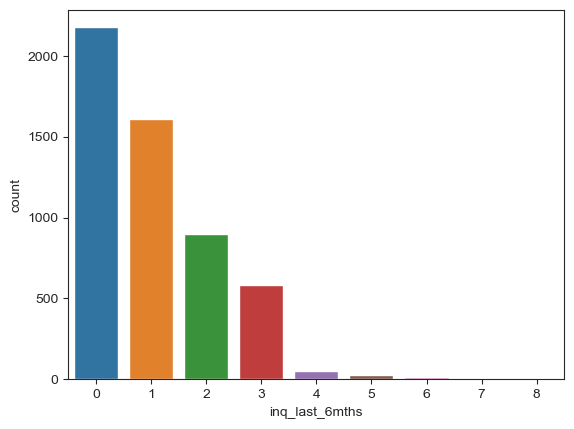

In [49]:
sns.countplot(x = 'inq_last_6mths', data = df[df.loan_status == 'Charged Off'])

### verification_status

<Axes: xlabel='verification_status', ylabel='count'>

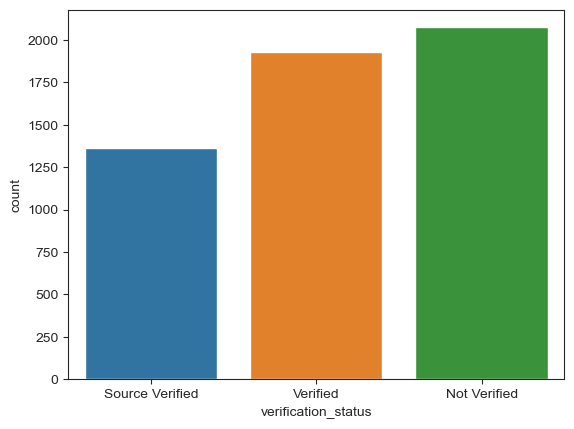

In [50]:
sns.countplot(x = 'verification_status', data = df[df.loan_status == 'Charged Off'])

### purpose

<Axes: xlabel='count', ylabel='purpose'>

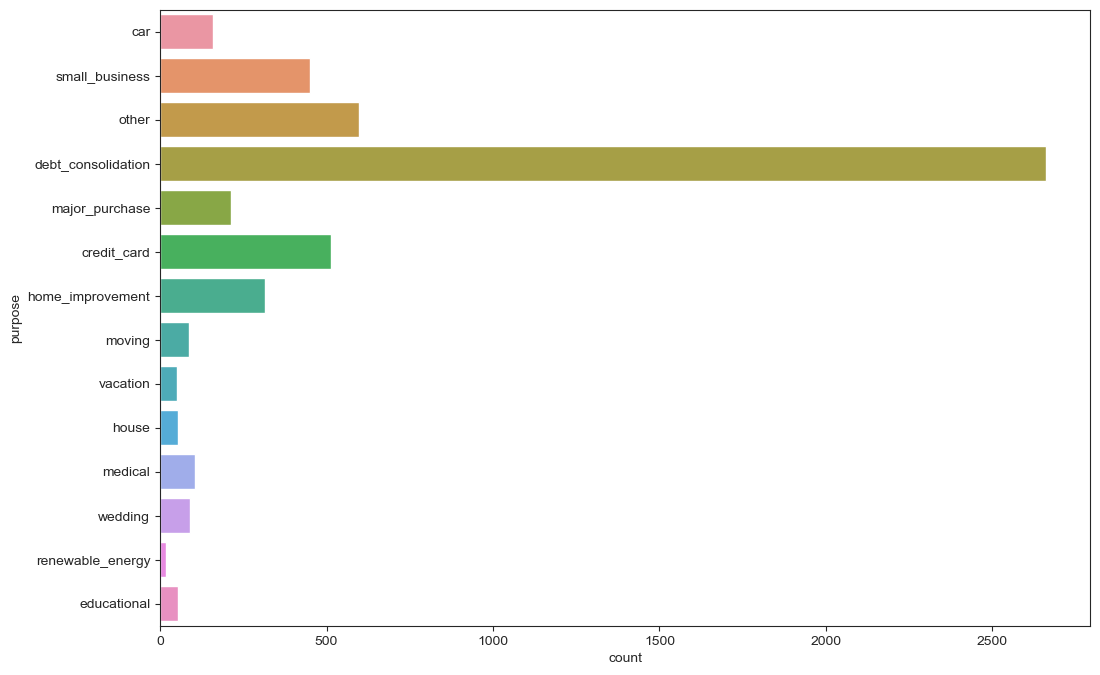

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y = 'purpose', data = df[df.loan_status == 'Charged Off'], ax=ax)

### addr_state

<Axes: xlabel='count', ylabel='addr_state'>

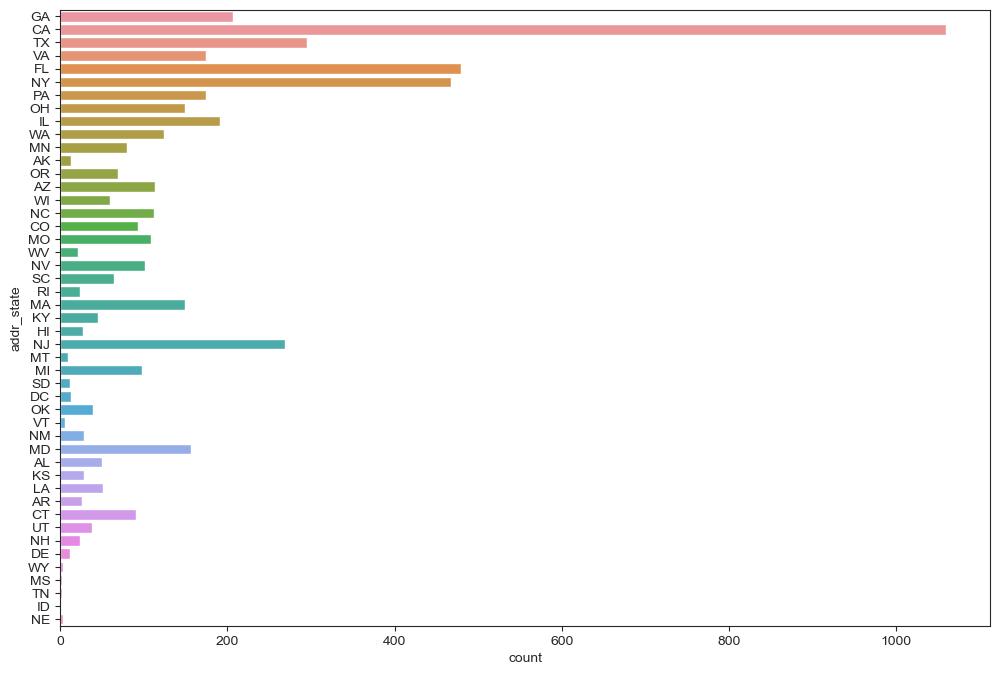

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y = 'addr_state', data = df[df.loan_status == 'Charged Off'], ax=ax)

## Derived Variable Analysis

### issued month and year

In [53]:
df['issue_month'], df['issue_year'] = zip(*df.issue_d.map(lambda x: x.split('-')))
# https://stackoverflow.com/a/12356541 to create/derive 2 columns from 1 at the same time

<Axes: xlabel='issue_year', ylabel='count'>

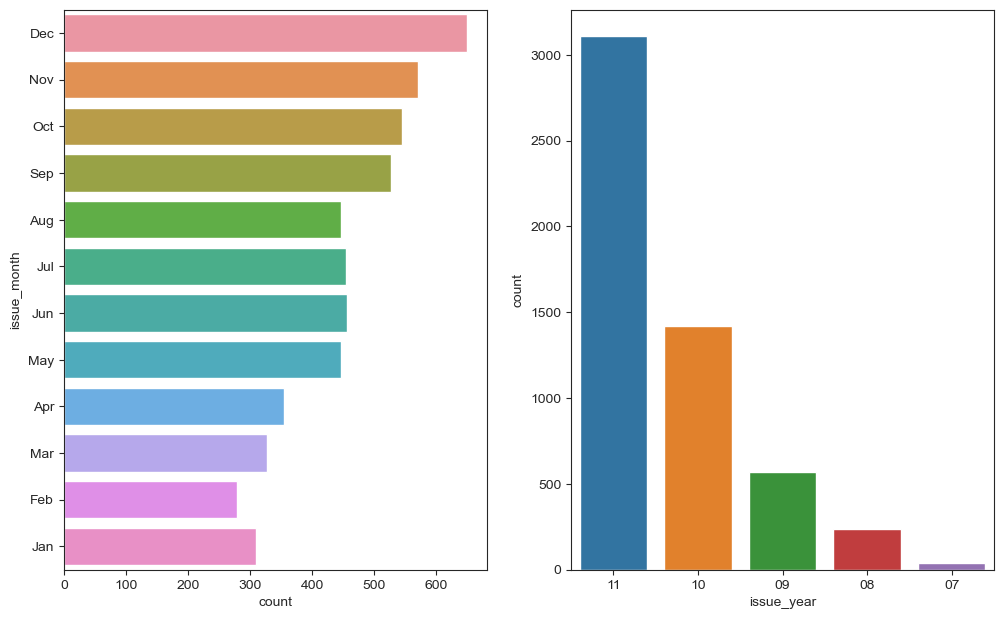

In [54]:
plt.figure(figsize=(12, 16))
plt.subplot(221)
sns.countplot(y = 'issue_month', data = df[df.loan_status == 'Charged Off'])
plt.subplot(222)
sns.countplot(x = 'issue_year', data = df[df.loan_status == 'Charged Off'])

### int_rate as bin

In [55]:
int_rate_bins = df.int_rate.quantile([x/100 for x in range(1, 100, 20)])
df['int_rate_bins'] = pd.cut(df['int_rate'], int_rate_bins)

<Axes: xlabel='count', ylabel='int_rate_bins'>

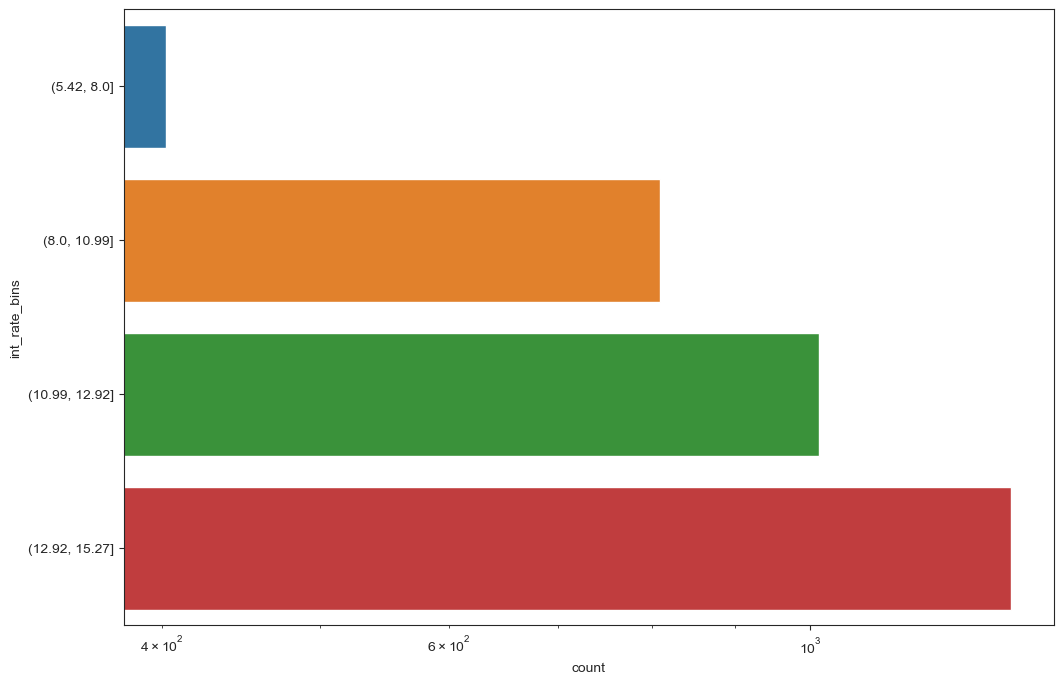

In [56]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xscale('log')
sns.countplot(y = 'int_rate_bins', data = df[df.loan_status == 'Charged Off'], ax=ax)

### loan_amount as bin

In [57]:
loan_amnt_bins = df.loan_amnt.quantile([x/100 for x in range(1, 100, 10)])
df['loan_amnt_bins'] = pd.cut(df['loan_amnt'], loan_amnt_bins)

<Axes: xlabel='count', ylabel='loan_amnt_bins'>

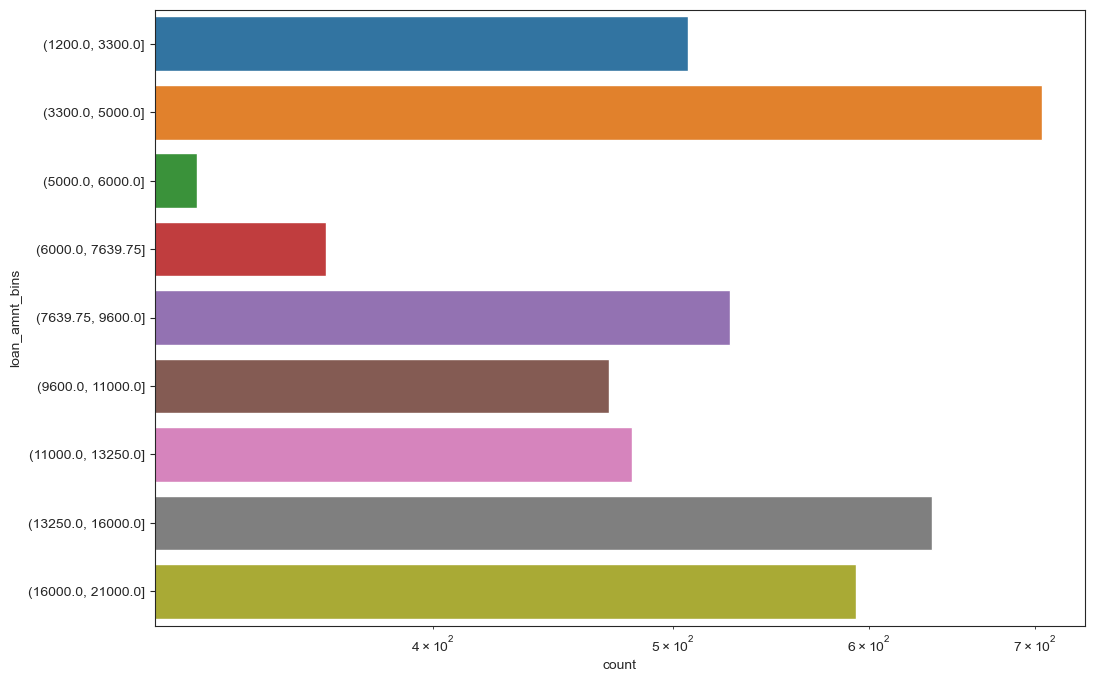

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xscale('log')
sns.countplot(y = 'loan_amnt_bins', data = df[df.loan_status == 'Charged Off'], ax=ax)

### dti as bin

In [59]:
dti_bins = df.dti.quantile([x/100 for x in range(1, 100, 5)])
df['dti_bins'] = pd.cut(df['dti'], dti_bins)

<Axes: xlabel='count', ylabel='dti_bins'>

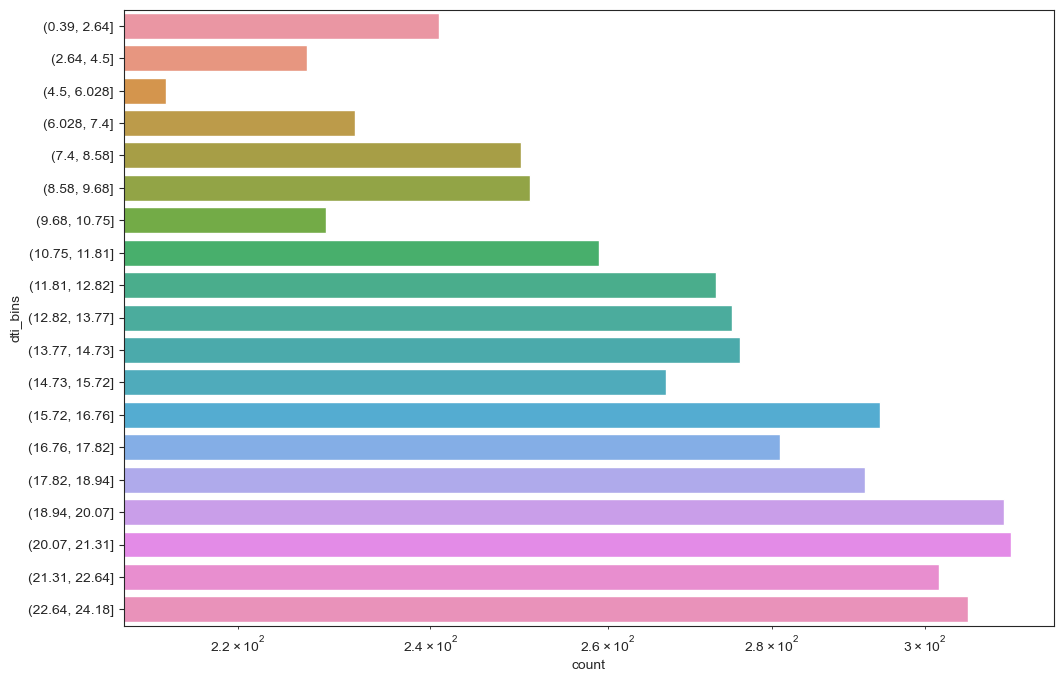

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xscale('log')
sns.countplot(y = 'dti_bins', data = df[df.loan_status == 'Charged Off'], ax=ax)

## Segmented Univariate Analysis

### comparing purpose with some columns

In [61]:
df[df.loan_status == 'Charged Off'].pivot_table(index='purpose', values = ['loan_amnt', 'dti', 'installment', 'int_rate'])

,dti,installment,int_rate,loan_amnt
purpose,,,,
car,11.811899,200.732722,12.371329,7280.221519
credit_card,15.531832,350.144444,13.363177,12648.440546
debt_consolidation,15.219102,365.027045,14.234218,13288.110902
educational,11.329811,241.496226,12.817547,7794.339623
home_improvement,12.311835,319.644937,13.213354,11462.895570
house,11.500364,324.421818,15.157091,11559.545455
major_purchase,11.526995,252.597887,12.899202,9033.920188
medical,12.205096,246.231346,13.350865,8670.673077
moving,12.483678,165.436552,12.367471,5650.862069


### comparing home_ownership with some columns

In [62]:
df[df.loan_status == 'Charged Off'].pivot_table(index='home_ownership', values = ['loan_amnt', 'dti', 'installment', 'int_rate'])

,dti,installment,int_rate,loan_amnt
home_ownership,,,,
MORTGAGE,14.373489,369.516267,13.711800,13732.931589
OTHER,13.511765,431.654706,13.285882,13379.411765
OWN,13.861385,308.005634,13.767300,11010.211268
RENT,13.903315,299.322442,13.841044,10478.429767


### comparing emp_length with some columns

In [63]:
df[df.loan_status == 'Charged Off'].pivot_table(index='emp_length', values = ['loan_amnt', 'dti', 'installment', 'int_rate'])

,dti,installment,int_rate,loan_amnt
emp_length,,,,
0,13.139611,283.173971,13.437812,9927.066451
1,13.928013,300.005246,13.623884,10549.051339
2,13.669378,298.693931,13.797276,10470.383912
3,13.910933,311.255616,13.898843,11126.026119
4,13.564447,320.710880,13.870632,11219.300226
5,14.413182,331.188773,13.798409,11894.431818
6,14.435408,340.087551,13.959932,12416.411565
7,14.941548,338.491667,13.975873,12334.821429
8,14.991649,352.579381,13.677423,12819.329897


## Bivariate Analysis

### Correlation Matrix plot

C:\Users\anura\AppData\Local\Temp\ipykernel_5304\1351743511.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr(), fignum=f.number)


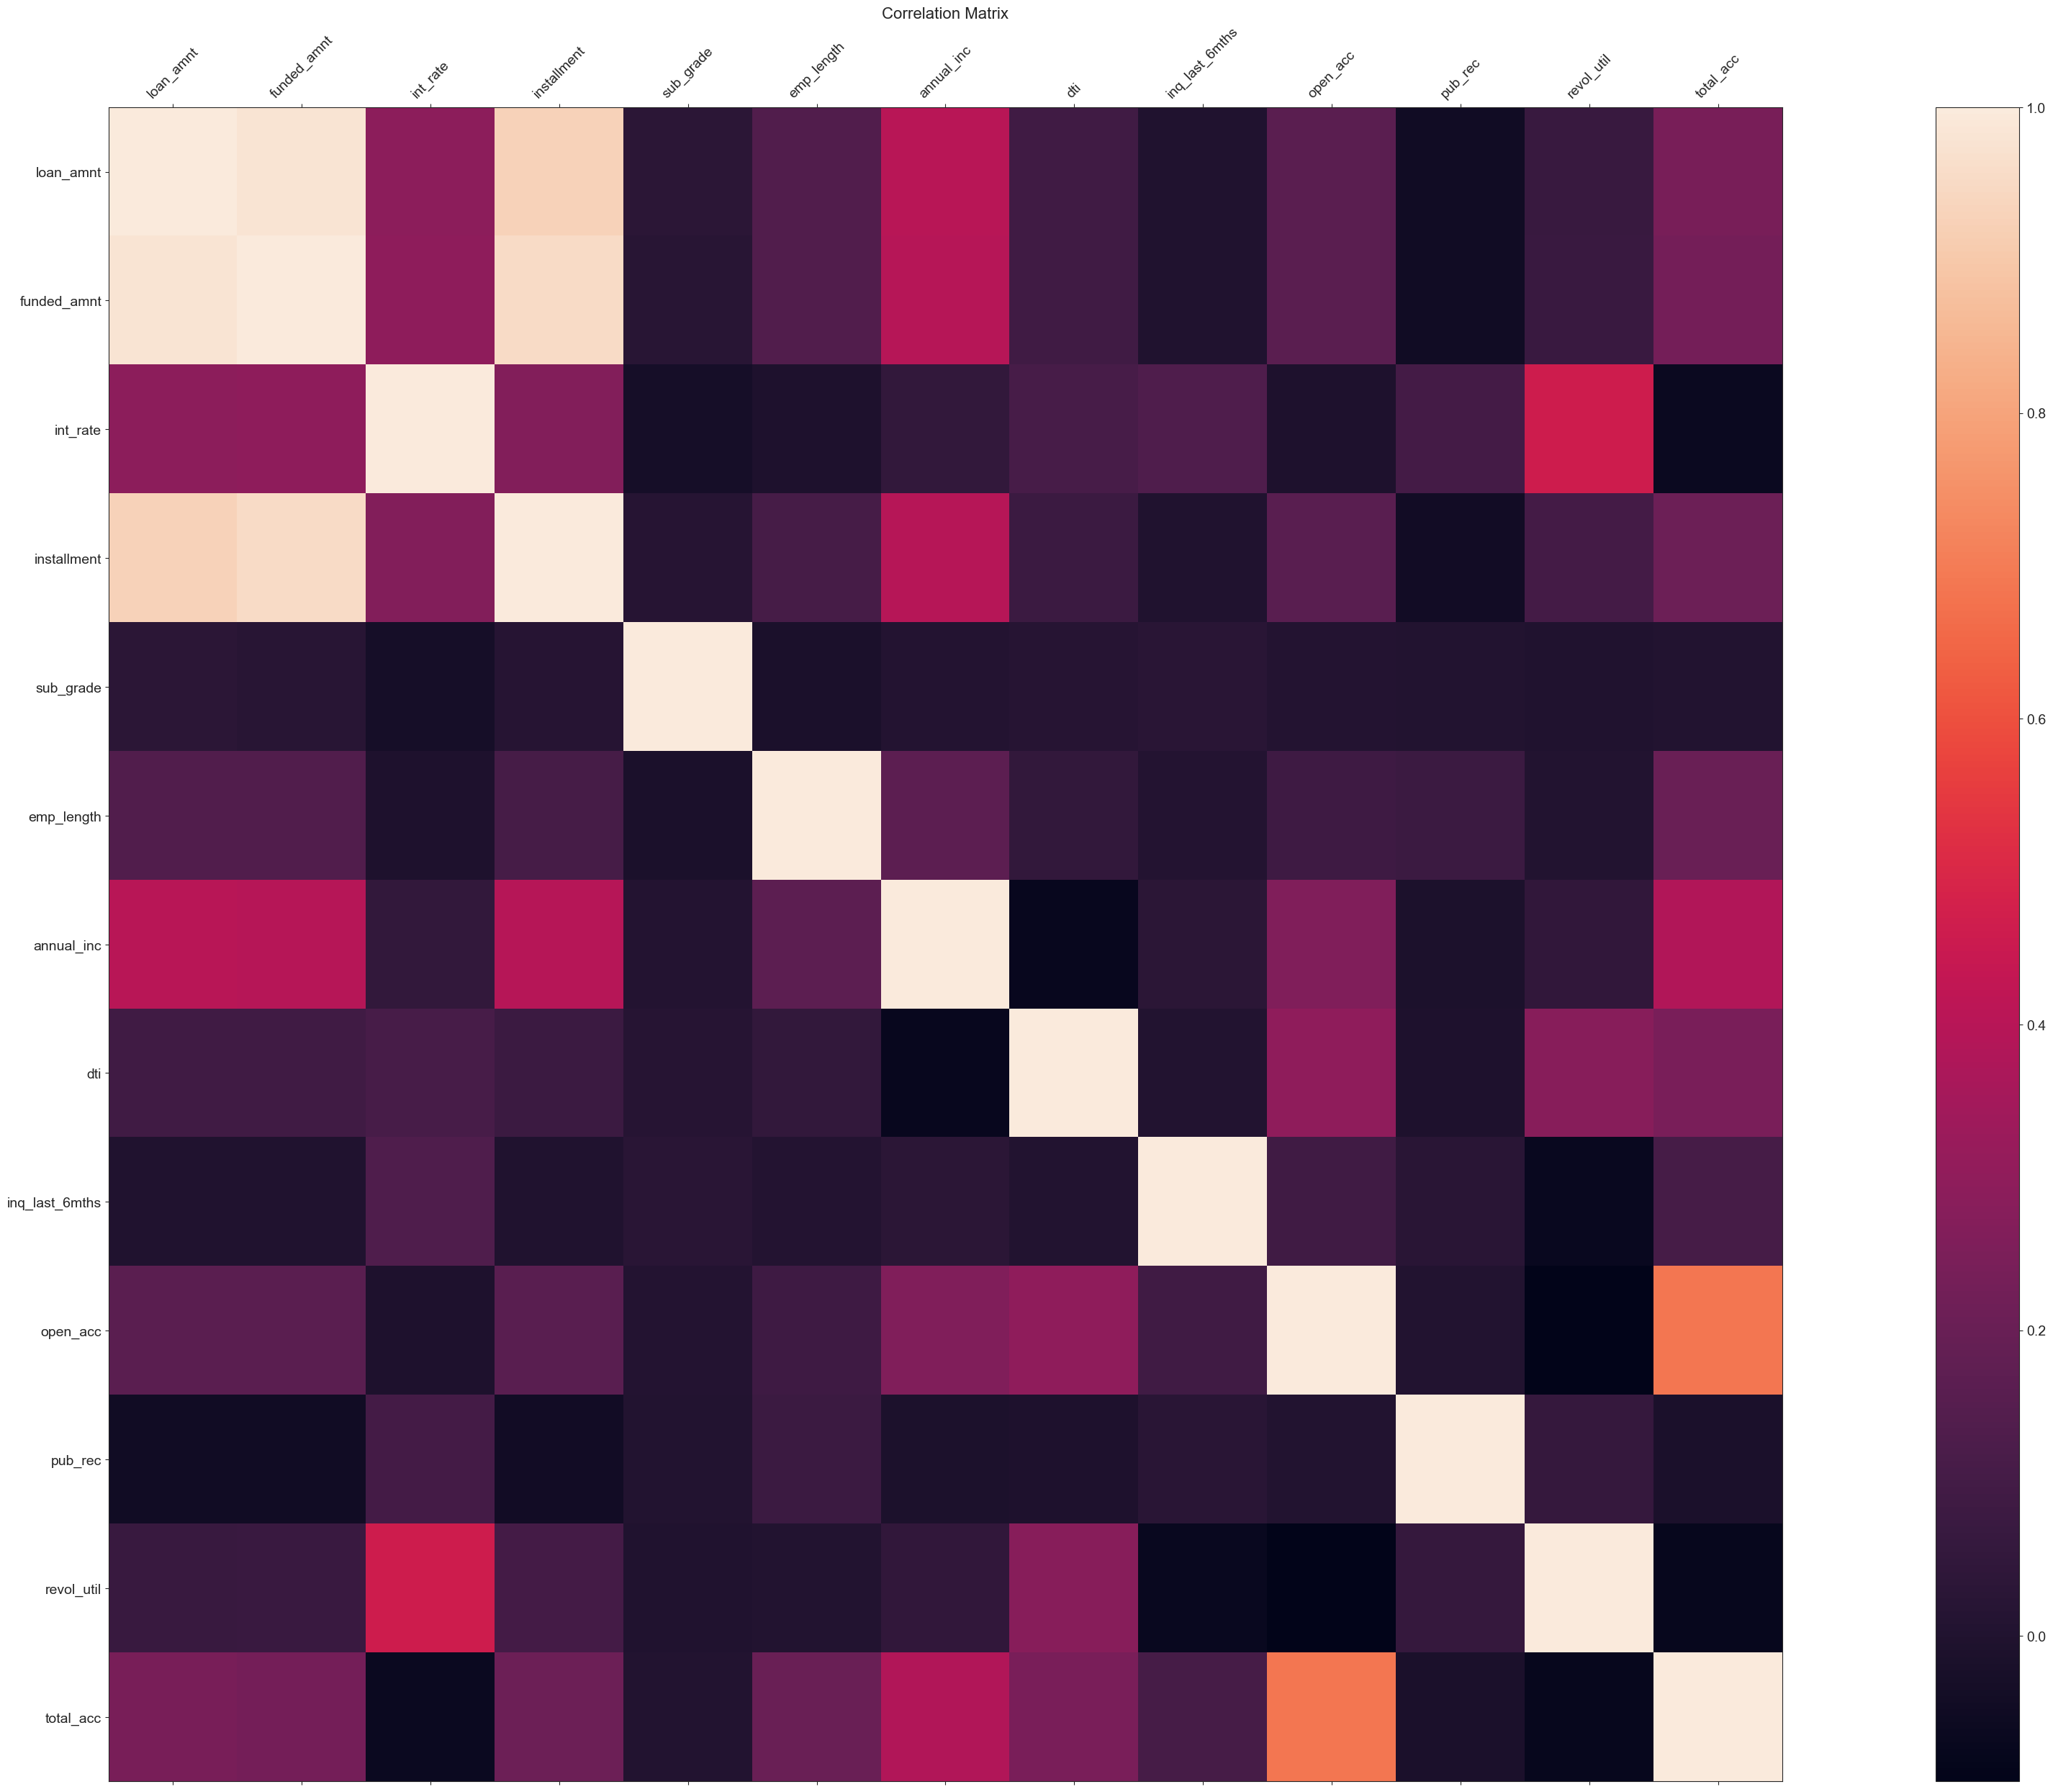

In [64]:
f = plt.figure(figsize=(55, 30))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

> sadly there is little to no correlation between the columns in this dataset that can help us dig deeper in the nature of those relations

### int_rate vs loan_amnt

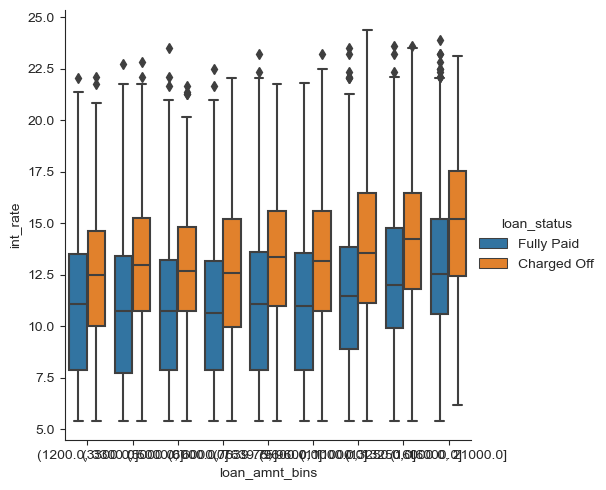

In [65]:
sns.catplot(data =df,y ='int_rate', x ='loan_amnt_bins', hue ='loan_status', kind = 'box')

> here we can see that `int_rate is generally higher` when loan_status is _Charged Off_

### dti_bins vs loan_amnt

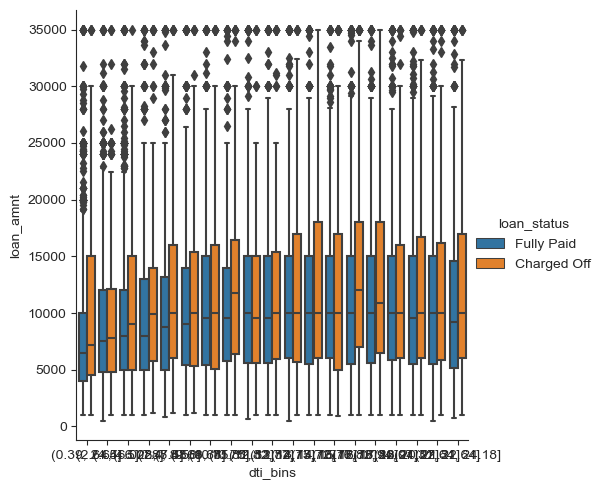

In [96]:
sns.catplot(data =df,y ='loan_amnt', x ='dti_bins', hue ='loan_status', kind = 'box')

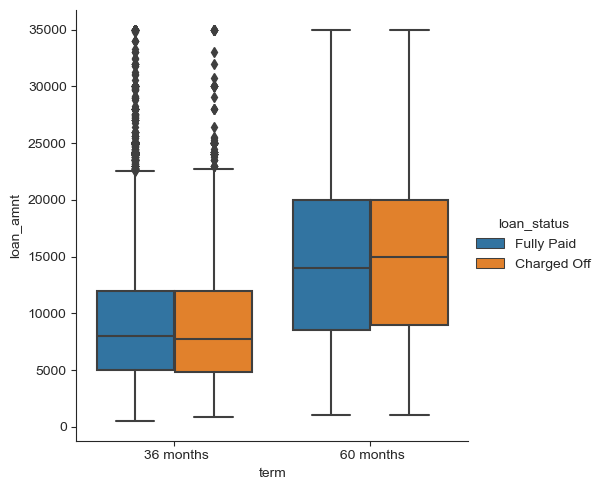

In [102]:
sns.catplot(data =df,y ='loan_amnt', x ='term', hue ='loan_status', kind = 'box')

> here we can see that applicants apply for long term loans with higher loan amount, but this doesn't effect the loan_status as the loan_status is at same level

### purpose vs loan_amnt

<Axes: xlabel='loan_amnt', ylabel='purpose'>

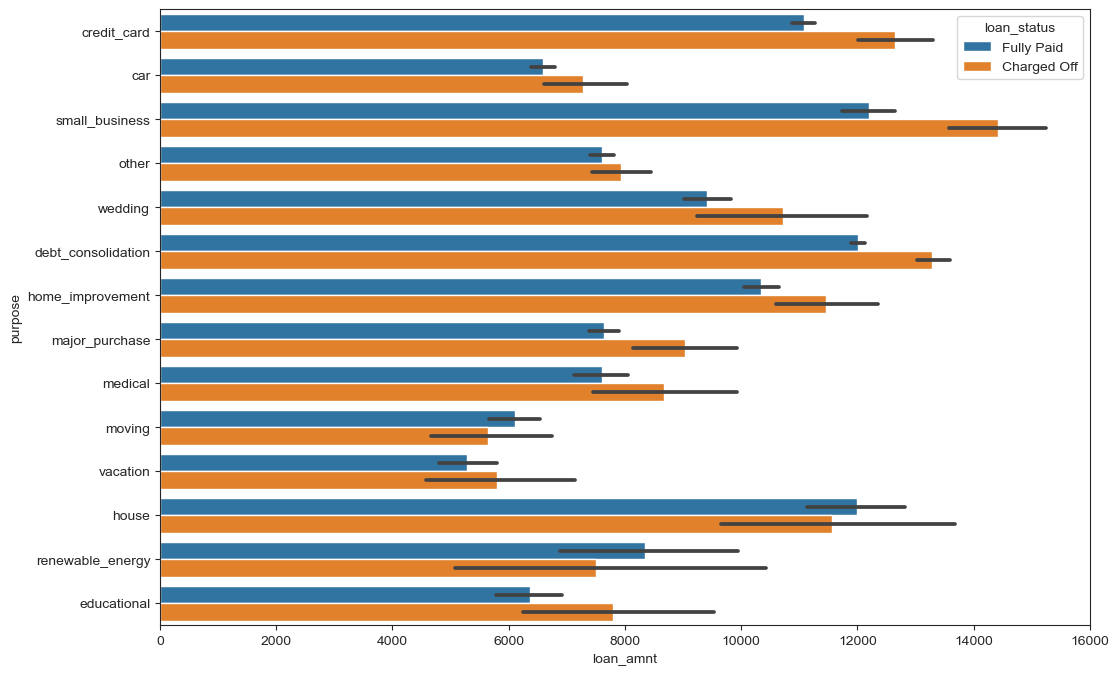

In [74]:
plt.figure(figsize=(12,8))
sns.barplot(data =df,x='loan_amnt', y='purpose', hue ='loan_status')

> here we can see that the highest loan amounts are taken for `small_business`, `house`, `debt_consolidation` and `home_improvement`

### emp_length vs loan_amnt

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

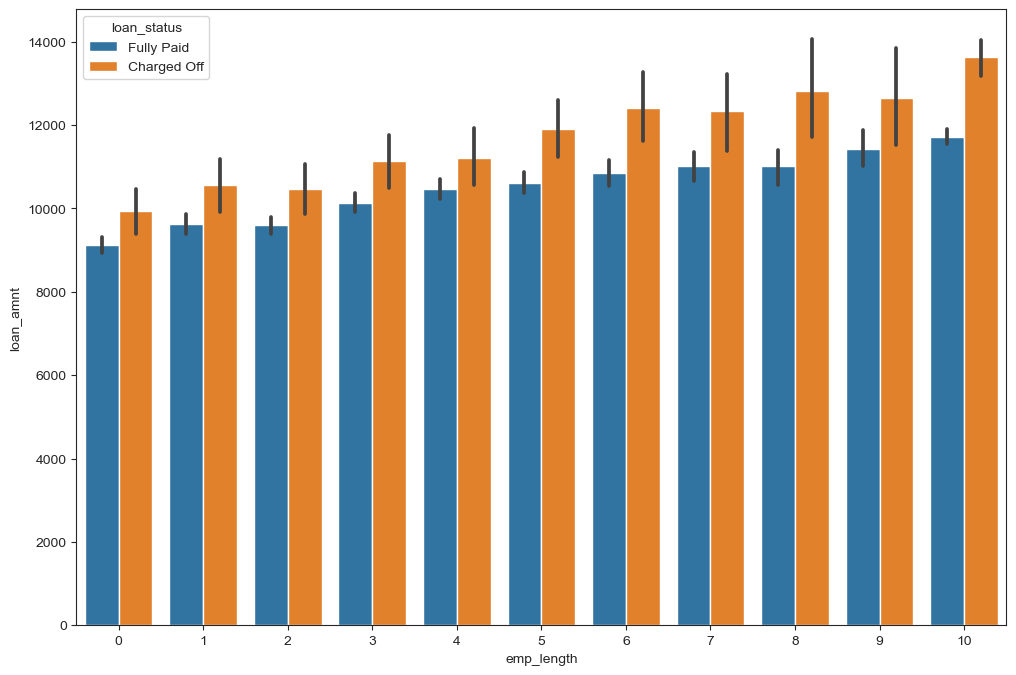

In [75]:
plt.figure(figsize=(12,8))
sns.barplot(data =df,x='emp_length', y='loan_amnt', hue ='loan_status')

# Observations

#### According to the analysis we did above on the loan dataset, we can say that a applicant has more probability of defaulting on loan when applicant: 

1. loan grade is B (specifically B5)
1. has +10 years of employement experience
1. has house on RENT or MORTGAGE
1. has a short term loan (36 months)
1. has zero public derogatory records
1. has no enquiries about the loan in last 6 months
1. verification status is not verified
1. purpose of taking loan is debt consolidation
1. lives in California state
1. loan issue month has DEC and loan issue year was 2011 (loan issue year being 2011 causing many defaulters could be because of financial crisis in USA around that time frame)
1. interest rate is more than 12.92%
1. loan amount was between 3300 - 5000 USD or above 16K USD
1. purpose for loan being small business and loan amount ranges within 14k to 16k USD
1. purpose for loan being home improvement and loan amount ranges within 11k to 13k USD

### other interesting findings are:

1. interest rate was generally higher for all loan amount brackets when applicant defaulted
1. purpose for highest loan amounts were 
	1. small_business
	1. house
	1. debt_consolidation
	1. home_improvement